In [25]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import sys

import cv2
import pandas as pd
import pydicom
from itertools import chain

# Import data

In [3]:
# Find directory of all files
cwd = os.path.normpath(os.getcwd() + os.sep + os.pardir)
wdpath = os.path.join(cwd, 'Data\\train_')
reader = sitk.ImageSeriesReader()

count = 0
path_nbr = os.listdir(wdpath)

file_list = []
file_dict = {}
for dir_ in path_nbr:
    dir_to_exp = os.path.join(wdpath, dir_)
    for dirpath, subdirs, files in os.walk(dir_to_exp):
        if files:
            file_list.append((dirpath, files))
            file_dict[dirpath] = files

print(len(path_nbr))
print(len(file_dict))


913
1740


In [4]:
# Look at the labels of the images
excel_labels_path = os.path.join(cwd, 'Data\\train.csv')
print(excel_labels_path)
df = pd.read_csv(excel_labels_path)
df

C:\Users\Killian\Jupyter\UNIFESP_body_part_classification\Data\train.csv


SOPInstanceUID Target
0     1.2.826.0.1.3680043.8.498.10025629581362719970...     0 
1     1.2.826.0.1.3680043.8.498.10036150326276641158...    15 
2     1.2.826.0.1.3680043.8.498.10038426859954986240...    12 
3     1.2.826.0.1.3680043.8.498.10050991192143676483...    14 
4     1.2.826.0.1.3680043.8.498.10053309524595490852...     3 
...                                                 ...    ...
1733  1.2.826.0.1.3680043.8.498.99711016467406172920...    14 
1734  1.2.826.0.1.3680043.8.498.99727280485333900933...    11 
1735  1.2.826.0.1.3680043.8.498.99935008698914755885...     3 
1736  1.2.826.0.1.3680043.8.498.99969671777553755311...     2 
1737  1.2.826.0.1.3680043.8.498.99979421603039894766...     2 

[1738 rows x 2 columns]

In [5]:
# Match directories to labels
img_label_dict = {}
for (key, value) in file_dict.items():
    for file in value:
        file_name = file[:-6]
        label = df['Target'].loc[df['SOPInstanceUID'] == file_name]
        labels = list(label.values)[0]
        labels = labels.split(' ')
        labels = [int(lab) for lab in labels if lab != '']
        img_label_dict[file] = (key, labels)


# Visualise 5 images by class

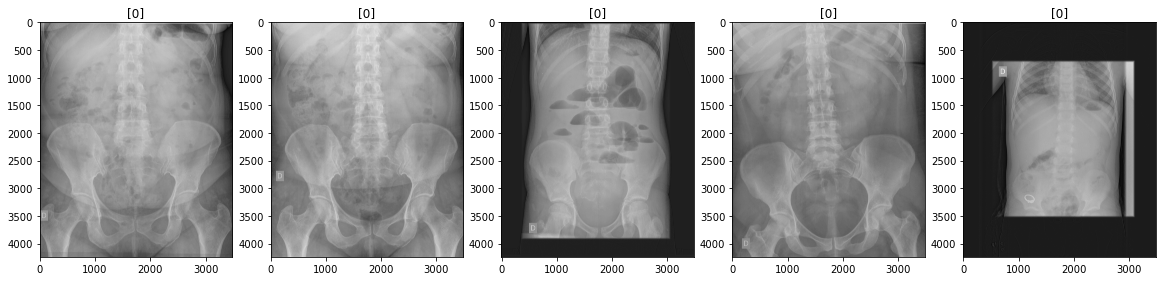

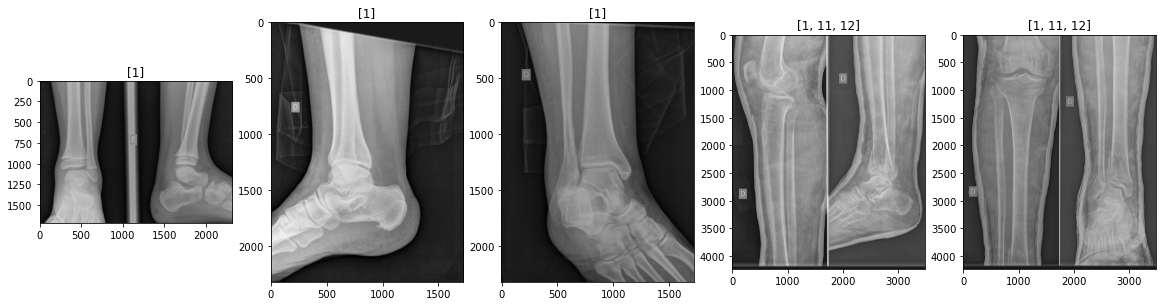

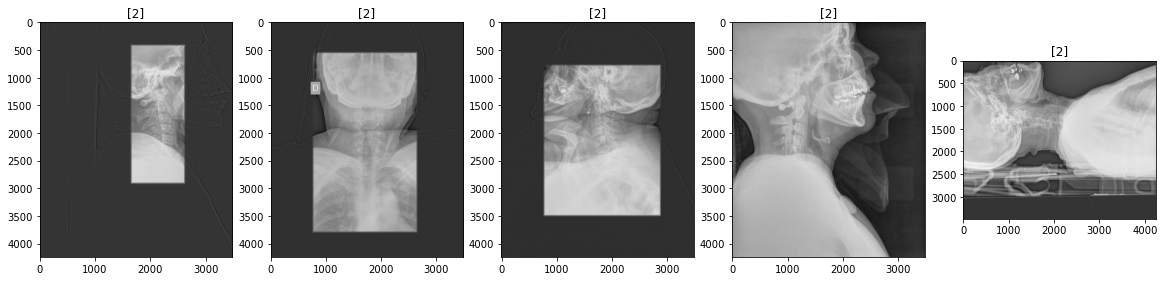

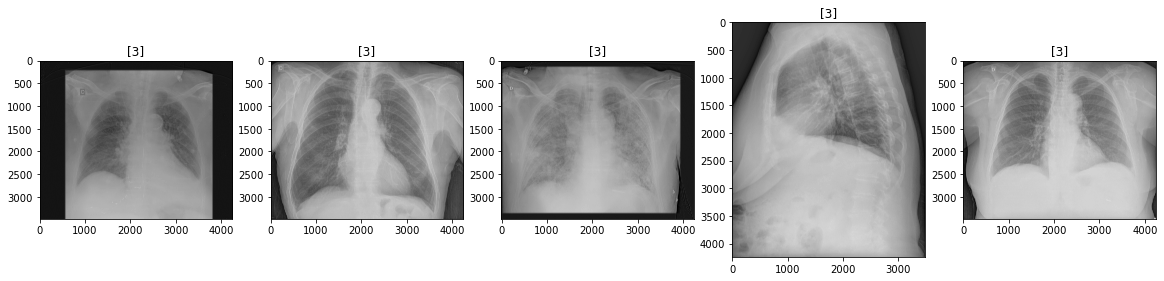

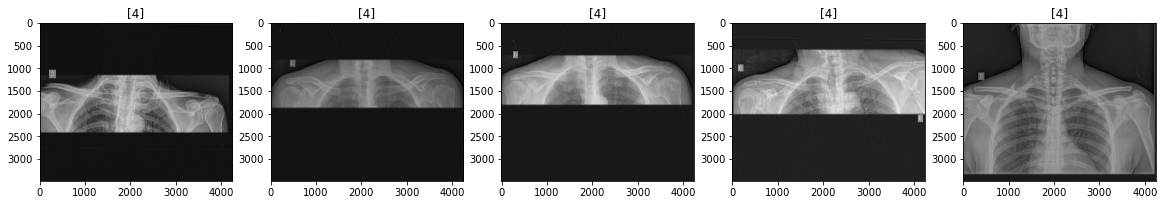

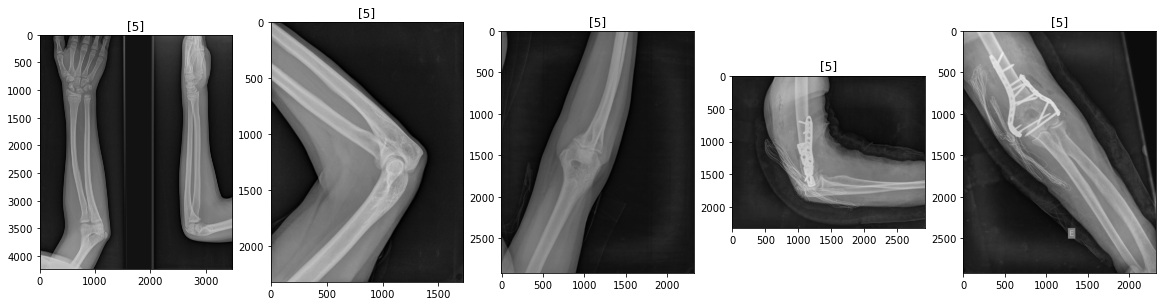

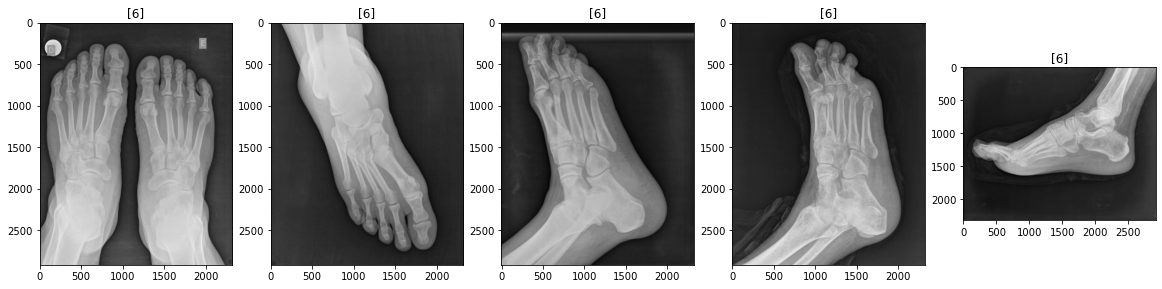

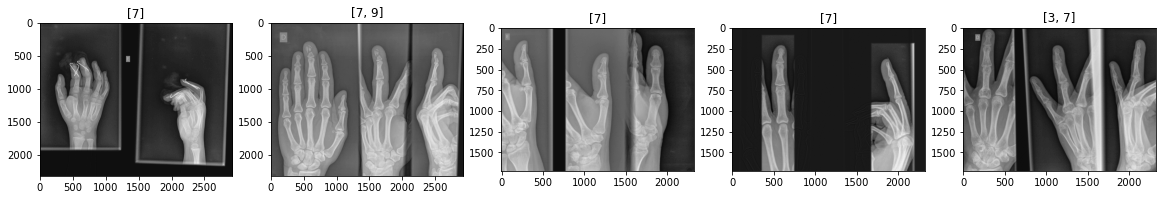

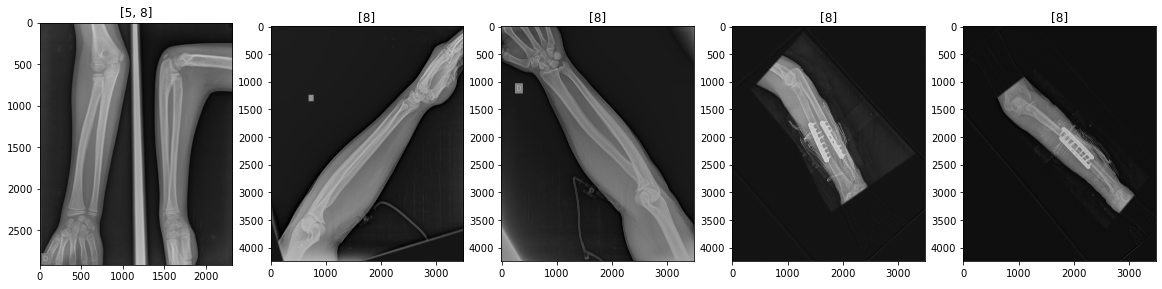

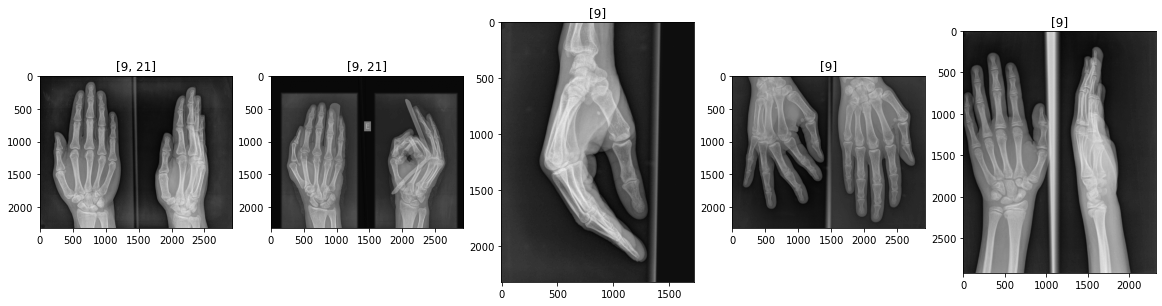

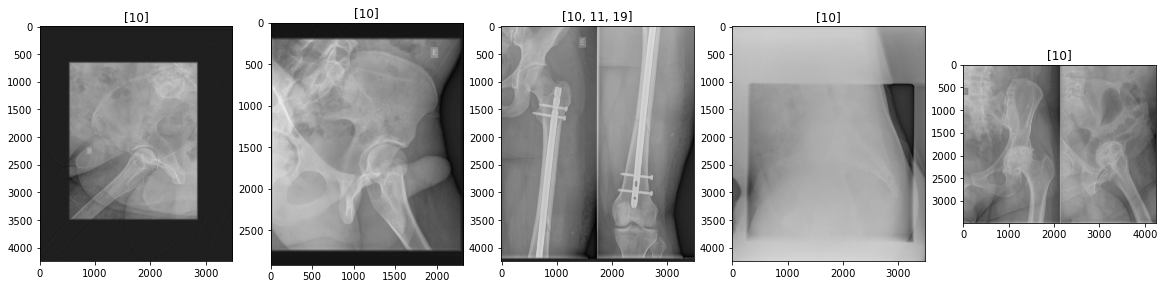

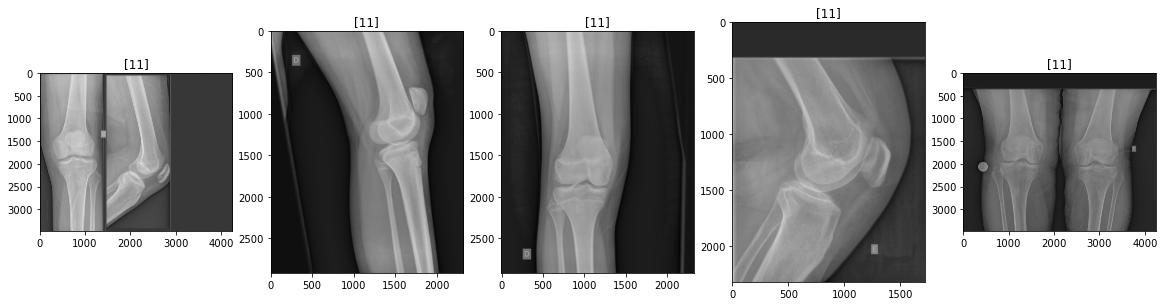

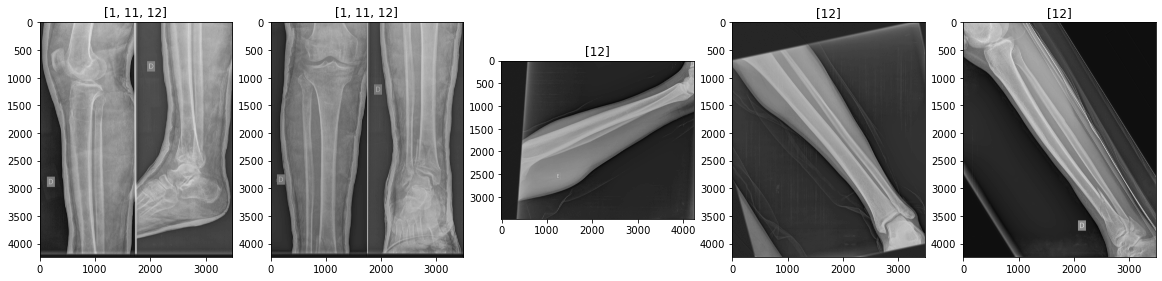

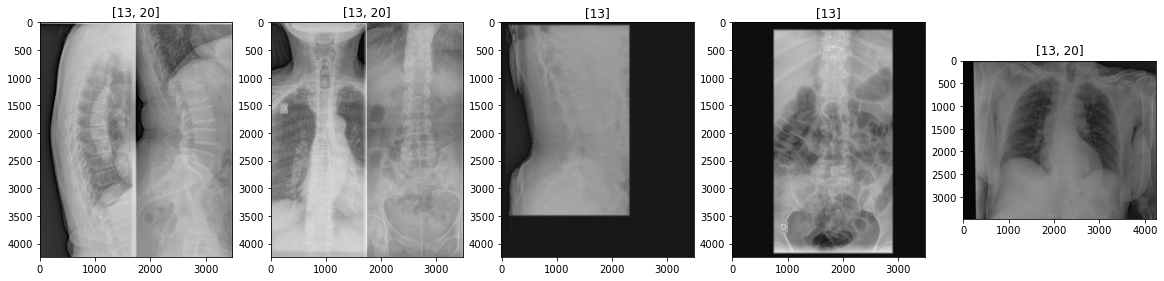

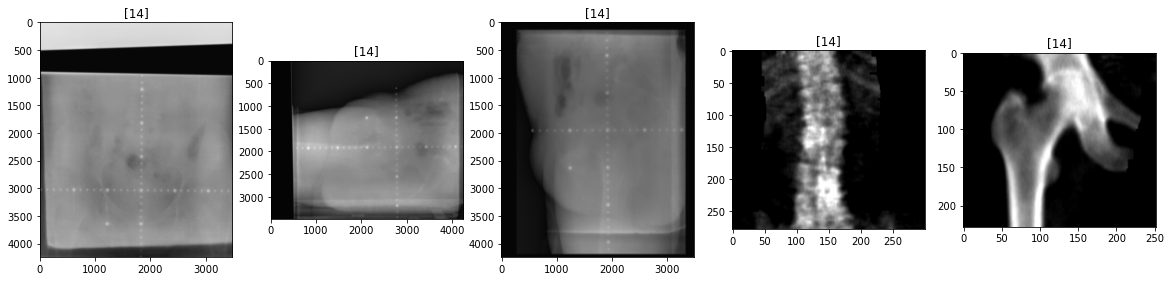

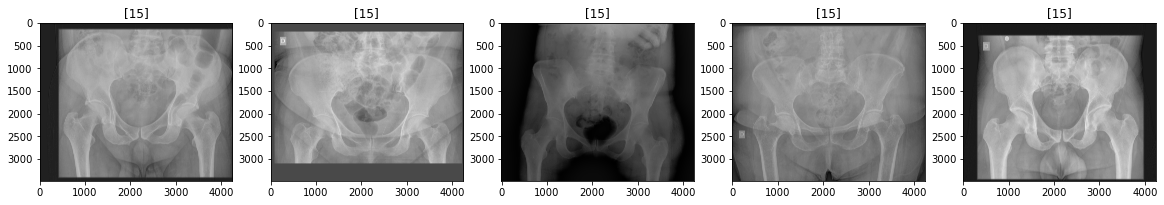

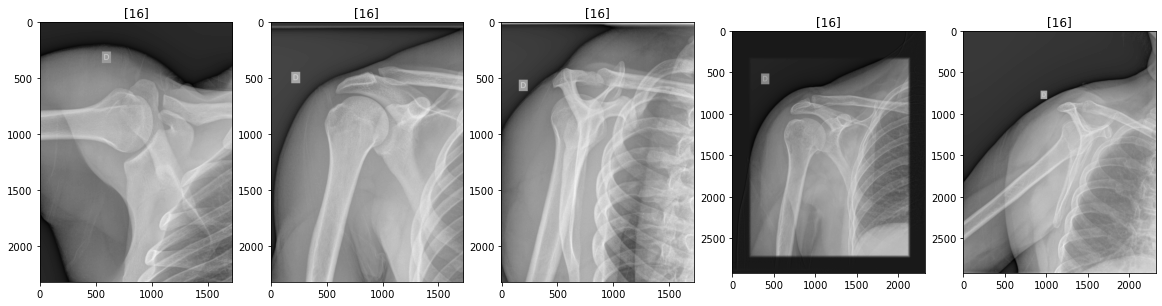

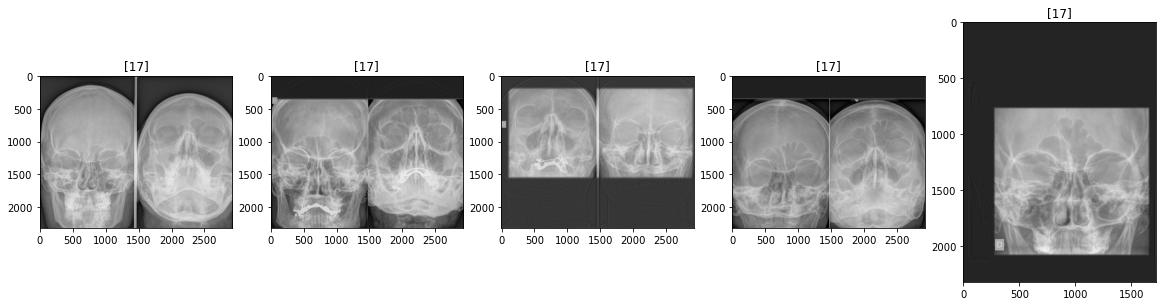

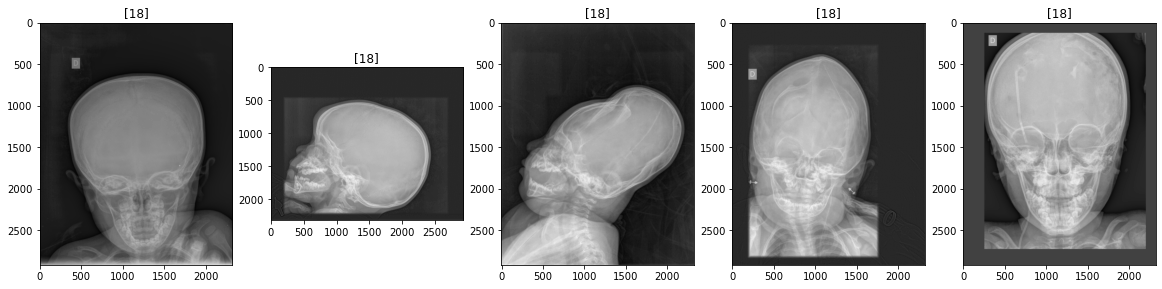

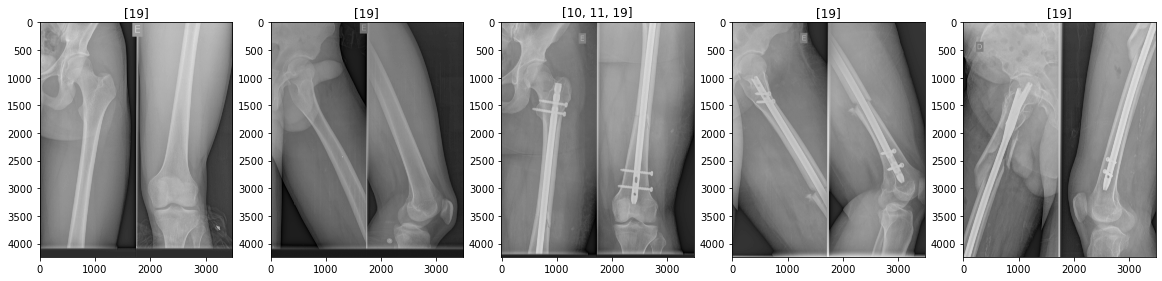

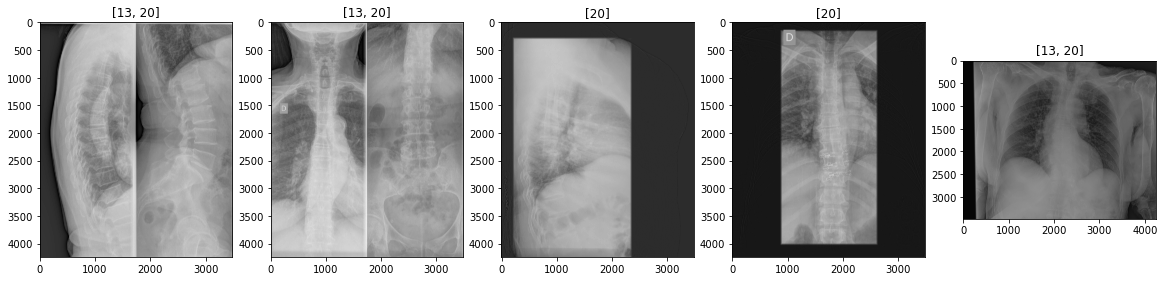

In [77]:
# Plot few images and intensities

count = 0
for class_ in np.arange(0, 21, 1):
    img_list = []
    label_list = []
    for key, value in img_label_dict.items():
        if class_ not in value[1]:
            pass
        else:
            img_path = value[0] + '\\' + key
            img_path = img_path.replace('\\', '//')
            image = sitk.ReadImage(img_path)
            image_array = sitk.GetArrayFromImage(image)
            img_list.append(image_array)
            label_list.append(value[1])

            
        if len(img_list) == 5:
            fig = plt.figure(figsize=(20, 5)) # create the canvas for plotting
            for i in range(5):
                ax = plt.subplot(1,5,i+1)
                image_array = img_list[i]
                plt.imshow(np.reshape(image_array, (image_array.shape[1], image_array.shape[2], image_array.shape[0])), cmap='gray')
                plt.title(label_list[i])
            plt.show()
            break

# Class distribution

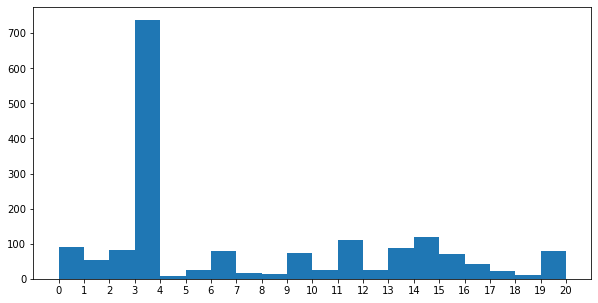

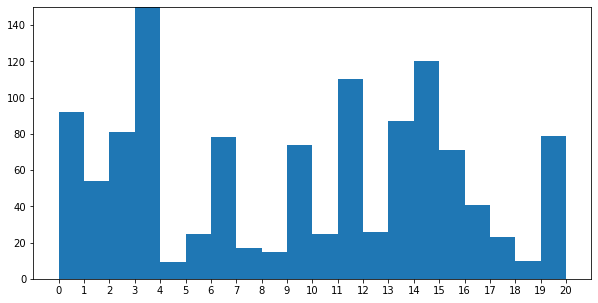

Counter({3: 738, 14: 120, 11: 110, 21: 105, 0: 92, 13: 87, 2: 81, 6: 78, 9: 74, 15: 71, 20: 64, 1: 54, 16: 41, 12: 26, 5: 25, 10: 25, 17: 23, 7: 17, 19: 15, 8: 15, 18: 10, 4: 9})


In [79]:
from collections import Counter

labels = [value[1] for key, value in img_label_dict.items()]
labels = list(map(int, chain.from_iterable(labels)))
plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(labels, bins=np.arange(0, 21, 1))
plt.xticks(np.arange(0, 21, 1))
plt.ylim(0, 150)
plt.show()
print(Counter(labels))